<a href="https://colab.research.google.com/github/ronmaccms/macadThesis24/blob/main/heatSink_Trained_over_night_on_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("flow_out.csv")

In [3]:
df

,sdf,sdf__x,sdf__y,area,u,v,p,u__x,u__y,v__x,...,pred_continuity,pred_momentum_y,pred_momentum_x,lambda_continuity,lambda_momentum_x,lambda_momentum_y,Points:0,Points:1,Points:2,Point ID
0,0.029212,-0.000000,-1.000000,0.001567,0.782041,-0.009361,4.118510,0.221240,-18.095200,-0.002479,...,0.281405,-0.347659,0.032356,0.029212,0.029212,0.029212,-0.659746,-0.079212,0,0
1,0.013692,0.000000,-1.000000,0.001567,0.085549,0.017496,5.623560,-0.010519,-5.995840,0.101403,...,-0.511993,-0.048355,-0.132628,0.013692,0.013692,0.013692,-2.327390,0.486308,0,1
2,0.201637,0.000000,-1.000000,0.001567,0.820064,0.084577,5.811700,-0.233779,-3.022600,0.050598,...,-0.172846,0.032708,0.083953,0.201637,0.201637,0.201637,-1.818900,0.298363,0,2
3,0.266309,0.000000,-1.000000,0.001567,1.115840,-0.022649,0.239714,-0.005411,-1.885350,0.048637,...,0.009965,-0.007441,0.008748,0.266309,0.266309,0.266309,1.388330,0.233691,0,3
4,0.055742,-0.000000,-1.000000,0.001567,1.100880,-0.008069,4.207760,0.229747,-7.123170,-0.010450,...,0.112250,-0.134609,-0.055577,0.055742,0.055742,0.055742,-0.676358,-0.105742,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.100721,0.000000,-1.000000,0.001567,1.039760,-0.156643,0.642035,-1.442120,-4.502490,0.370050,...,-0.001239,0.118265,-0.013880,0.100721,0.100721,0.100721,0.310000,0.399279,0,2995
2996,0.016256,0.647465,-0.762092,0.001567,0.518655,0.167097,0.470089,2.055230,-21.710400,2.899060,...,0.351520,-0.319057,0.830447,0.016256,0.016256,0.016256,0.010525,0.187611,0,2996
2997,0.105817,0.000000,-1.000000,0.001567,0.645835,-0.012486,0.207133,-0.039177,-3.852720,0.023869,...,-0.016740,-0.007702,-0.191103,0.105817,0.105817,0.105817,1.489000,0.394183,0,2997
2998,0.411506,0.000000,-1.000000,0.001567,1.180950,-0.021214,0.326714,0.295246,0.220479,0.045879,...,0.019664,0.016027,0.024386,0.411506,0.411506,0.411506,1.130280,0.088494,0,2998


In [4]:
df.columns

Index(['sdf', 'sdf__x', 'sdf__y', 'area', 'u', 'v', 'p', 'u__x', 'u__y',
       'v__x', 'v__y', 'p__x', 'p__y', 'continuity', 'u__x__x', 'u__y__x',
       'u__y__y', 'v__x__x', 'v__x__y', 'v__y__y', 'momentum_y', 'momentum_x',
       'true_continuity', 'true_momentum_x', 'true_momentum_y',
       'pred_continuity', 'pred_momentum_y', 'pred_momentum_x',
       'lambda_continuity', 'lambda_momentum_x', 'lambda_momentum_y',
       'Points:0', 'Points:1', 'Points:2', 'Point ID'],
      dtype='object')

In [5]:
df2 = pd.read_csv("heat_out.csv")

In [6]:
df2

,sdf,area,u,v,p,c,c__x,c__y,c__x__x,c__y__y,advection_diffusion_c,true_advection_diffusion_c,pred_advection_diffusion_c,lambda_advection_diffusion_c,Points:0,Points:1,Points:2,Point ID
0,0.459600,0.001567,1.074210,0.025569,0.419047,0.169023,-0.002523,0.097212,0.006323,-0.136076,0.000035,0,0.000035,1,0.884171,-0.040400,0,0
1,0.066973,0.001567,0.338675,-0.109631,5.919680,0.014594,0.023458,0.011565,0.029357,0.330851,0.005956,0,0.005956,1,-1.530670,-0.433027,0,1
2,0.423268,0.001567,1.111940,-0.026497,0.393616,0.166169,-0.001598,-0.067391,-0.030160,0.150349,-0.000232,0,-0.000232,1,0.946224,0.076732,0,2
3,0.053553,0.001567,1.343880,-0.018283,2.475130,0.040056,0.008758,-0.192399,0.003352,9.034650,-0.002789,0,-0.002789,1,-0.377629,0.446447,0,3
4,0.018478,0.001567,0.407357,0.019333,5.757990,0.029584,0.030891,-0.007164,0.506287,0.775475,0.009882,0,0.009882,1,-0.996007,0.481522,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.171244,0.001567,0.878942,0.029824,0.254784,0.054027,-0.001817,0.181055,0.009589,3.437800,-0.003092,0,-0.003092,1,1.304090,-0.328756,0,2995
2996,0.314496,0.001567,0.980622,-0.085409,5.922250,0.050012,0.054207,0.366068,0.092142,-0.341768,0.022391,0,0.022391,1,-1.577090,-0.185504,0,2996
2997,0.454999,0.001567,1.316750,0.002437,0.149385,0.166582,-0.002747,-0.094289,-0.000373,-2.651900,0.001458,0,0.001458,1,1.750710,0.045001,0,2997
2998,0.171939,0.001567,0.968375,0.075886,0.426789,0.057772,-0.016806,0.292683,0.083905,4.391390,-0.003014,0,-0.003014,1,0.772121,-0.328061,0,2998


In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'u_value')

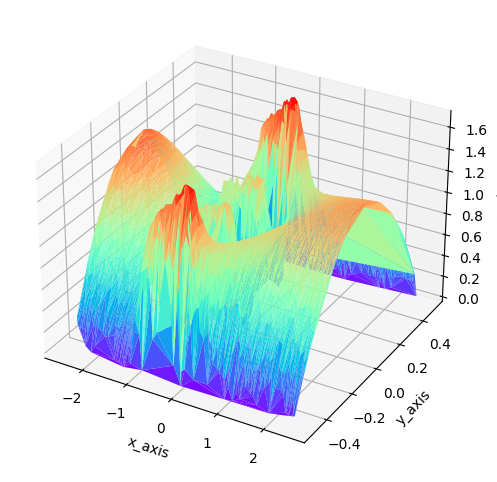

In [16]:
fig = plt.figure(figsize=(50,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df['Points:0'],df['Points:1'],df['u'],cmap='rainbow')

ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_zlabel('u_value')


Text(0.5, 0, 'u_value')

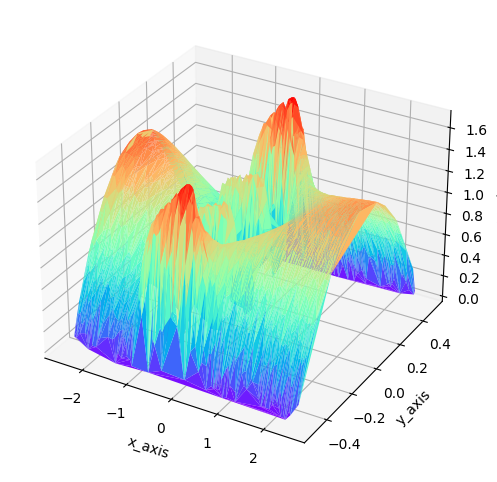

In [17]:
fig = plt.figure(figsize=(50,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df2['Points:0'],df2['Points:1'],df2['u'],cmap='rainbow')

ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_zlabel('u_value')


Text(0.5, 0, 'u_value')

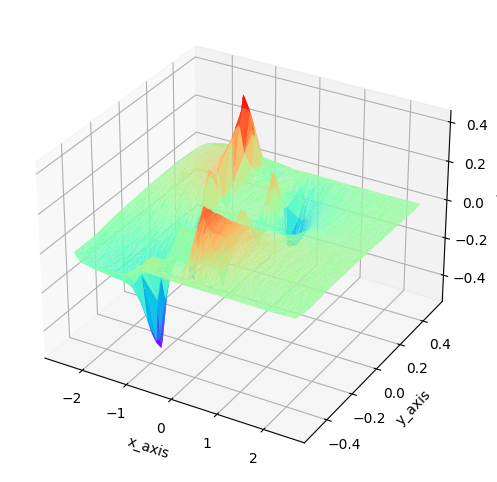

In [18]:
fig = plt.figure(figsize=(50,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df['Points:0'],df['Points:1'],df['v'],cmap='rainbow')
# ax.view_init(elev=90, azim=-90)

ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_zlabel('u_value')

Text(0.5, 0, 'p_value')

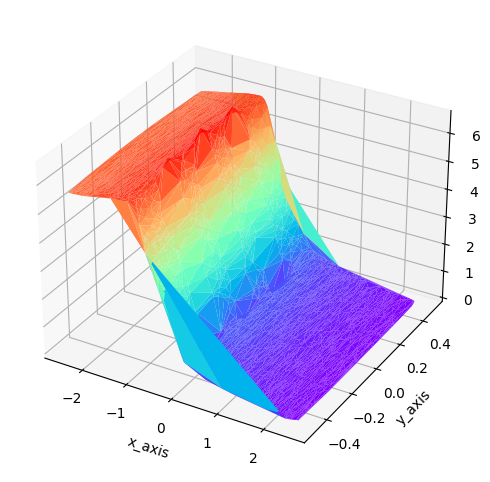

In [19]:
fig = plt.figure(figsize=(50,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df2['Points:0'],df2['Points:1'],df2['p'],cmap='rainbow')
# ax.view_init(elev=90, azim=-90)

ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_zlabel('p_value')

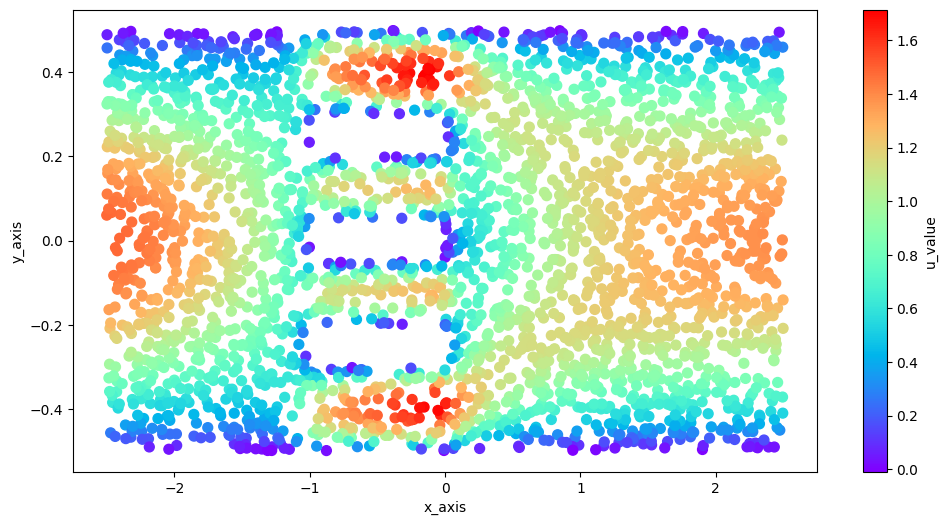

In [20]:
fig, ax = plt.subplots(figsize=(12,6))

scatter = ax.scatter(df['Points:0'],df['Points:1'],c=df['u'],cmap='rainbow', marker= 'o', s=50)
ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')

fig.colorbar(scatter, ax=ax, label= 'u_value')





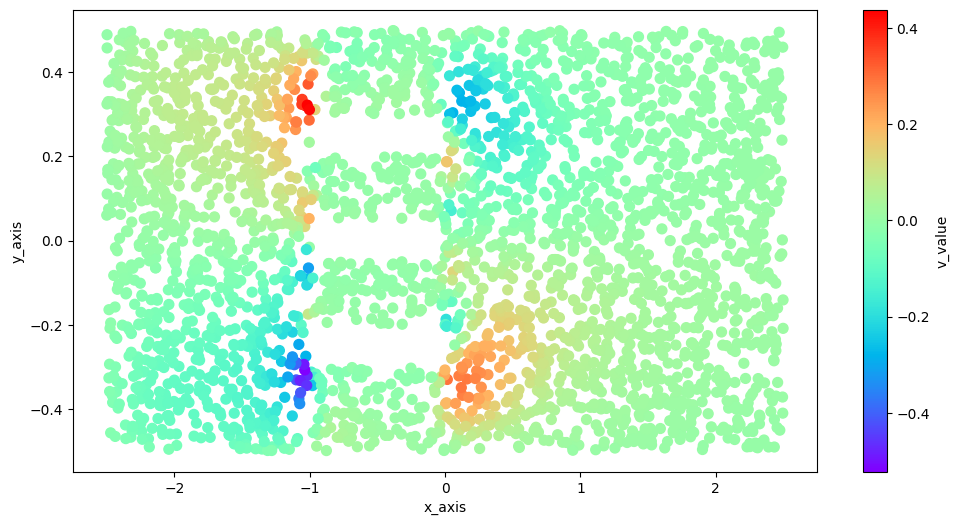

In [22]:
fig, ax = plt.subplots(figsize=(12,6))

scatter = ax.scatter(df['Points:0'],df['Points:1'],c=df['v'],cmap='rainbow', marker= 'o', s=50)
ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')

fig.colorbar(scatter, ax=ax, label= 'v_value')

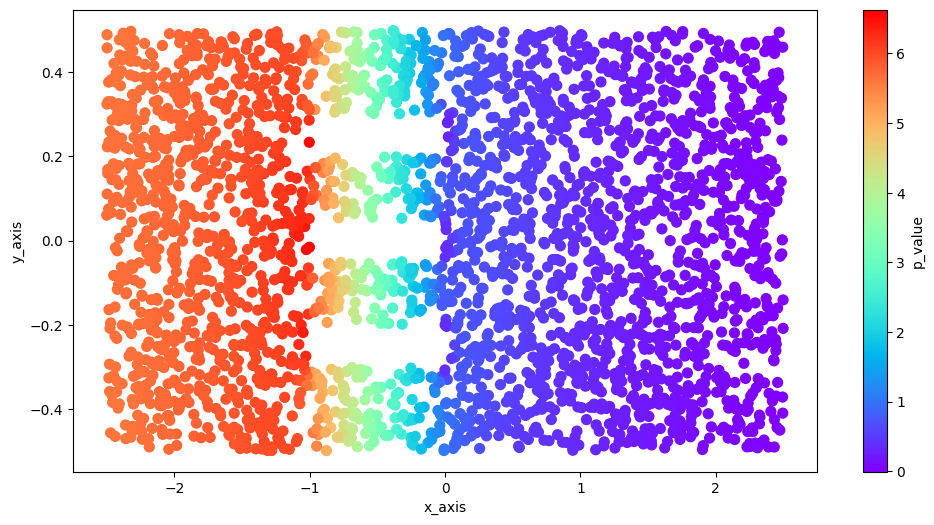

In [23]:
fig, ax = plt.subplots(figsize=(12,6))

scatter = ax.scatter(df['Points:0'],df['Points:1'],c=df['p'],cmap='rainbow', marker= 'o', s=50)
ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')

fig.colorbar(scatter, ax=ax, label= 'p_value')

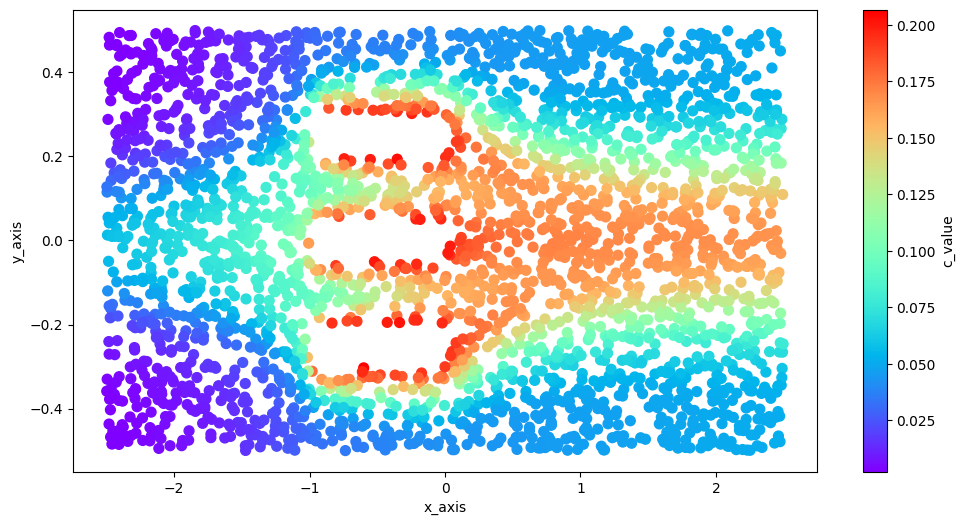

In [24]:
fig, ax = plt.subplots(figsize=(12,6))

scatter = ax.scatter(df2['Points:0'],df2['Points:1'],c=df2['c'],cmap='rainbow', marker= 'o', s=50)
ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')

fig.colorbar(scatter, ax=ax, label= 'c_value')